### Data prediction for a single stock JNJ with Prophet

In [1]:
import pandas as pd
from prophet import Prophet
from pandas import to_datetime
import matplotlib.pyplot as plt
df = pd.read_csv('../data/jnj1.csv')
df.head()

,ds,y
0,2012-01-03,65.879997
1,2012-01-04,65.480003
2,2012-01-05,65.400002
3,2012-01-06,64.830002
4,2012-01-09,64.930000


In [2]:
m = Prophet()
m.fit(df)

12:21:20 - cmdstanpy - INFO - Chain [1] start processing
12:21:22 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
future = m.make_future_dataframe(periods=6)
future.tail()

,ds
2818,2023-03-16
2819,2023-03-17
2820,2023-03-18
2821,2023-03-19
2822,2023-03-20


In [4]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2818,2023-03-16,173.392956,167.623244,179.665953
2819,2023-03-17,173.533703,167.705130,179.603252
2820,2023-03-18,174.091599,168.469775,180.239732
2821,2023-03-19,174.217134,168.286690,180.514412
2822,2023-03-20,173.688371,168.024886,179.661819


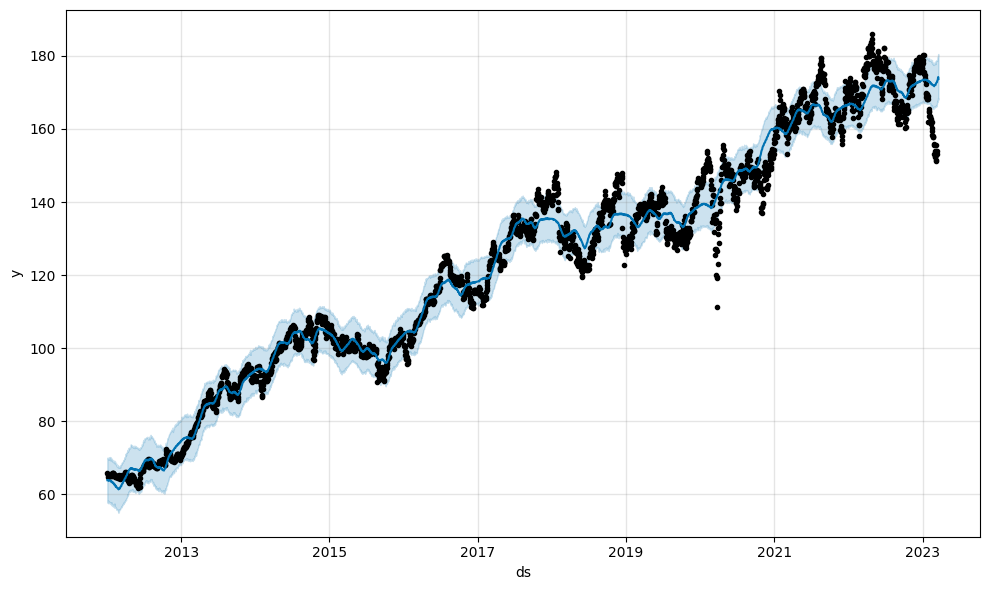

In [5]:
fig1 = m.plot(forecast)

## Example to display 12 days in future 

          ds        yhat  yhat_lower  yhat_upper
0 2023-01-01  173.800161  168.065018  179.943805
1 2023-02-01  173.092228  167.309907  178.953051
2 2023-03-01  171.948061  165.921781  178.303925
3 2023-04-01  175.765961  169.675449  181.585955
4 2023-05-01  178.248168  171.803306  184.013387


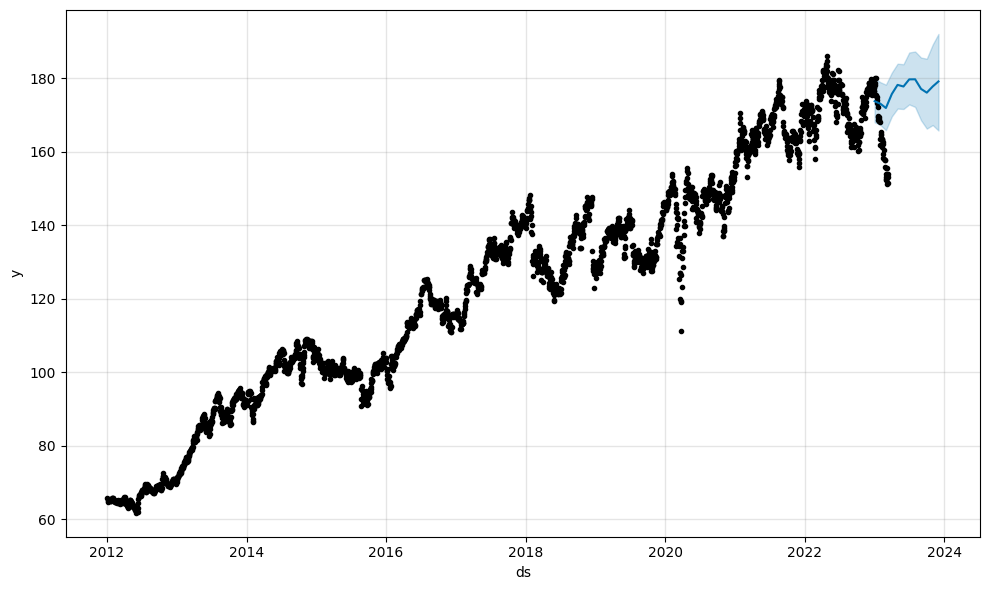

In [6]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2023-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = m.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
m.plot(forecast)
plt.show()